# MODELAGEM E SIMULAÇÃO DO MUNDO FÍSICO #

*PROJETO HOTWHEELS*




**Os parâmetros**

In [97]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# colocando os parâmetros

mr = 0.5/1000 #em gramas
m = 42.24/1000 #em gramas
R1 = 1/1000 #em metros
R2 = 99/2/1000 #em metros
I = 1/2*(mr*((R1**2)+(R2**2)))
g = 9.8 #metros/segundo**2
peso = m*g #em N
Cd = 0.82
A = (2/100)*(2/100)
p = 1
ang = math.radians(20)
sen = math.sin(ang)
cos = math.cos(ang)
altura = 1.05*math.sin(ang)
Xmax = altura/math.tan(ang)

**Na rampa**

In [98]:
def EquaçãoDiferencial(listaSolucao, t, a):
    x = listaSolucao[0]
    y = listaSolucao[1]
    Vx = listaSolucao[2]
    Vy = listaSolucao[3]
    lista_velocidade = []
    v = math.sqrt(Vx**2 + Vy**2)
    D = 1/2*(p*Cd*A*(v**2))
    N = peso*cos
    fat = (peso*sen-D)/(4 + m*(R2**2)/I)
    D = 0
    dxdt = Vx
    dydt = Vy
    dVxdt = ((N*sen) - (D*cos) - (4*fat*cos))/m
    dVydt = ((N*cos) + (D*sen) + (4*fat*sen))/m - g    
    if x > Xmax:        
        dVxdt = 0
        dVydt = 0
        
        
    return dxdt, dydt, dVxdt, dVydt, v


    

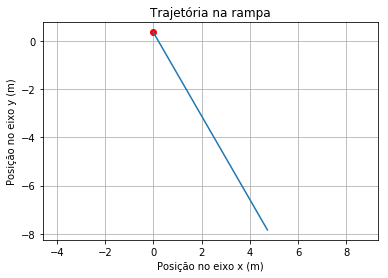

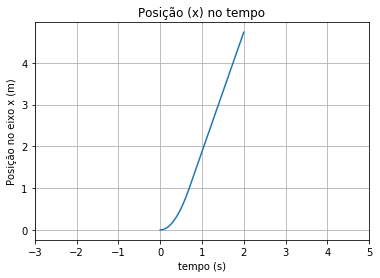

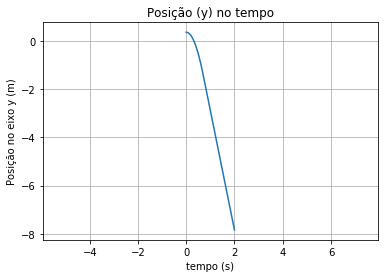

3.30274
4.34670
5.72073


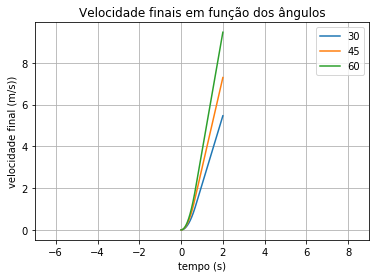

2.65307
5.72073


In [105]:
delta_t = 1e-3
tempo = np.arange(0,2,delta_t)
CI = [0,altura,0,0,0]
solucao = odeint(EquaçãoDiferencial, CI, tempo, args=(ang,))

#plotando posição inicial
plt.plot(CI[0],CI[1],'ro')

#plotando trajtória
plt.plot(solucao[:,0], solucao[:,1])
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Trajetória na rampa')
plt.axis('equal')
plt.grid(True)
plt.show()

#plotando x no tempo
plt.plot(tempo, solucao[:,0])
plt.xlabel('tempo (s)')
plt.ylabel('Posição no eixo x (m)')
plt.title('Posição (x) no tempo')
plt.axis('equal')
plt.grid(True)
plt.show()

#plotando y no tempo
plt.plot(tempo, solucao[:,1])
plt.xlabel('tempo (s)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Posição (y) no tempo')
plt.axis('equal')
plt.grid(True)
plt.show()


#gráfico da influência do ângulo na velocidade final da rampa

lista_de_angulos = [30,45,60]

for angulo in lista_de_angulos:
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI, tempo, args=(ang_radianos,))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2)) 
    print('%.5f' %vf)
    plt.plot(tempo, solucao_para_velocidade[:,4],label=angulo)
plt.xlabel('tempo (s)')
plt.ylabel('velocidade final (m/s))')
plt.title('Velocidade finais em função dos ângulos')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


#Verificando a velocidade final
vxf = solucao[:,2][-1]
vyf = solucao[:,3][-1]
vf = math.sqrt((vxf**2) + (vyf**2))

print('%.5f' %math.sqrt(2*g*altura))
print('%.5f' %vf)

**Validação por energia**


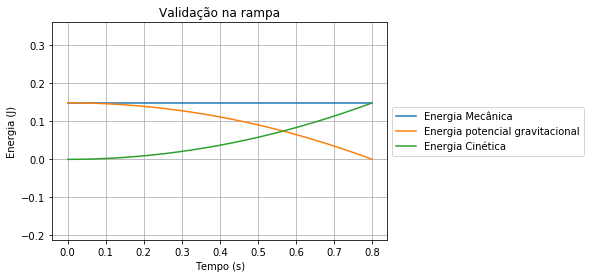

In [100]:
#calcular a energia do carrinho
energia_gravitacional=[]
energia_cinetica=[]
energia_total=[]

for i in range(len(tempo)):  
    x = solucao[:,0][i]
    y = solucao[:,1][i]
    Vx = solucao[:,2][i]
    Vy = solucao[:,3][i]
    Vt = math.sqrt((Vx**2) + (Vy**2))
    cinetica = (m*Vt**2)/2 +4*(I*(Vt/R2)**2)/2                                      
    pot_gravitacional = m*g*y
    mecanica = cinetica+ pot_gravitacional
    
    if x <= Xmax:
        energia_gravitacional.append(pot_gravitacional)
        energia_cinetica.append(cinetica)
        energia_total.append(mecanica)
    else:
        break

#achando o último termo da lista de energia para criar depois uma lista equivalente de tempo
ultimo = len(energia_total) 

#criando uma nova lista de tempo
tempo_valida = np.arange(0, ultimo*delta_t, delta_t )

#plotando o gráfico das energias pelo tempo
plt.plot(tempo_valida, energia_total, label="Energia Mecânica")
plt.plot(tempo_valida, energia_gravitacional, label="Energia potencial gravitacional")
plt.plot(tempo_valida, energia_cinetica, label="Energia Cinética")
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.title('Validação na rampa')
plt.grid(True)
plt.show()


**No looping**


In [57]:
R_do_loop = 11/100

In [86]:
def EquaçãoDiferencial2(listaSolucao, t):

    a = listaSolucao[0]
    w = listaSolucao[1]
    dadt = w
    v = w*R_do_loop
    D = 1/2*(p*Cd*A*(v**2))
    D=0
    #velocidade positiva

    if w > 0:
        fat = (-peso*math.cos(a)-D)/(4 + m*(R2**2)/I)       
        dwdt = (-peso*math.cos(a) - D - 4*fat)/(m*R_do_loop) 
        

    #velocidade negativa

    else:
        fat = (peso*math.cos(a)-D)/(4 + m*(R2**2)/I)
        dwdt = (-peso*math.cos(a) + D + 4*fat)/(m*R_do_loop)
    return dadt, dwdt, v
    

3.30274
4.34670
5.72073


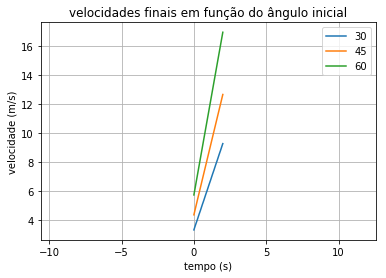

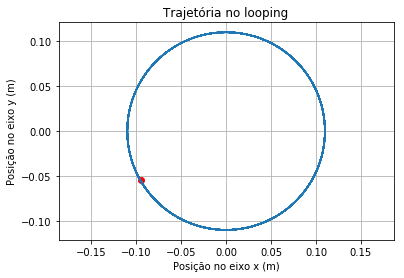

16.96697


In [106]:
tempo1 = np.arange(0,2,delta_t) 

# Vamos encontrar com o for a seguir a velocidade final para cada ângulo e atualizar os valores de vf e a0
for angulo in lista_de_angulos:
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI, tempo, args=(ang_radianos,))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2)) 
    a0 = -math.pi/2 - ang_radianos
    w0 = vf/R_do_loop
    CI1 = [a0,w0,vf]
    solucao1 = odeint(EquaçãoDiferencial2, CI1, tempo1)

    #lista de todos os alphas no tempo
    alphas = solucao1[:,0]

    #lista de todos os omegas no tempo
    omegas = solucao1[:,1]

    #Calculando posição
    xloop = [R_do_loop*math.cos(a) for a in alphas]
    yloop = [R_do_loop*math.sin(a) for a in alphas]
    
    plt.plot(tempo1, solucao1[:,2], label = angulo)
plt.grid(True)
plt.title('velocidades finais em função do ângulo inicial')
plt.xlabel('tempo (s)')
plt.ylabel('velocidade (m/s)')
plt.legend()
plt.axis('equal')
plt.show()



    #script para ver o comportamento da normal no percurso

    #for a in alphas:
    #    N = [((m)*(w*R_do_loop)**2)/R_do_loop - m*g*math.sin(a) for w in omegas]
    #for i in range(len(N)):
    #    print(N[i])


# Gráfico da trajetória
plt.plot(R_do_loop*math.cos(a0), R_do_loop*math.sin(a0), 'ro')
plt.plot(xloop, yloop)
plt.grid(True)
plt.title('Trajetória no looping')
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.axis('equal')
plt.show()

#Verificando a velocidade final
vf_loop = solucao1[:,2][-1]


print('%.5f' %vf_loop)


**Validação por energia**

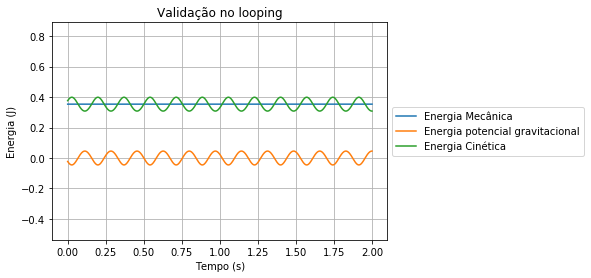

In [60]:
#calcular a energia do carrinho
energia_gravitacional1 = []
energia_cinetica1 = []
energia_total1 = []

for i in range(len(tempo)):
    a = solucao1[:,0][i]
    x_posicao = R_do_loop*math.cos(a)
    w = solucao1[:,1][i]
    v = w*R_do_loop
    y = R_do_loop*math.sin(a)
    cinetica = (m*v**2)/2 +4*(I*(v/R2)**2)/2    
    pot_gravitacional = m*g*y
    mecanica = cinetica+ pot_gravitacional
    
    if x_posicao <= 2*math.pi*R_do_loop:
        energia_gravitacional1.append(pot_gravitacional)
        energia_cinetica1.append(cinetica)
        energia_total1.append(mecanica)
    else:
        break


ultimo1 = len(energia_total1) 
#criando uma nova lista de tempo
tempo_valida1 = np.arange(0, ultimo1*delta_t, delta_t )



#plotando o gráfico das energias pelo tempo
plt.plot(tempo_valida1, energia_total1, label="Energia Mecânica")
plt.plot(tempo_valida1, energia_gravitacional1, label="Energia potencial gravitacional")
plt.plot(tempo_valida1, energia_cinetica1, label="Energia Cinética")
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.title('Validação no looping')
plt.grid(True)
plt.show()

**Gráfico da trajetória total**

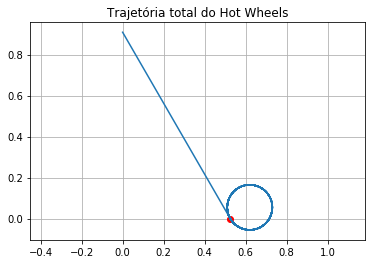

In [61]:
xtotal = []
ytotal = []
for i in range(0,len(tempo)):
    if(solucao[:,1][i]>=0):
        xtotal.append(solucao[:,0][i])
        ytotal.append(solucao[:,1][i])

for i in range(0,len(tempo1)):
    xtotal.append(xloop[i] + Xmax + R_do_loop*math.sin(ang))
    ytotal.append(yloop[i] + R_do_loop*math.cos(ang)) 


plt.plot(xloop[0]+ Xmax + R_do_loop*math.sin(ang),yloop[0]+ R_do_loop*math.cos(ang),'ro')    
plt.plot(xtotal, ytotal)
plt.axis('equal')
plt.grid(True)
plt.title('Trajetória total do Hot Wheels')
plt.show()